#                               Periodični signali
Dejan Križaj, 2019

**Namen:** Zvezek (Notebook) je namenjen prikazu uporabe Jupytra za prikaz in analizo periodičnih signalov. 

 

**Prej bi lahko predelal tudi:**



<div class="alert alert-block alert-info">
<b>Namig:</b> Obstajata dve verziji tega dokumenta. Ena je v obliki html datoteke (končnica html), ki je ni mogoče izvajati, druga pa ima končnico ipny (Jupyter Notebook), ki jo lahko izvajamo z Jupyter aplikacijo. To aplikacijo imate lahko naloženo na vašem računalniku in se izvaja v brskalniku, lahko jo ogledujete s spletno aplikacijo nbViewer, s spletnimi aplikacijami Binder ali Google Colab  pa jo lahko tudi zaganjate in spreminjate. Več o tem si preberite v 
<a href="http://lbm.fe.uni-lj.si/index.php?option=com_content&view=article&id=59&Itemid=135&lang=si">tem članku</a>.
<br>    
Za izvajanje tega zvezka ne potrebujete posebnega znanja programiranja v Pythonu, lahko pa poljubno spreminjate kodo in se sproti učite tudi uporabe programskega jezika. Več podobnih primerov je na Githubu na https://github.com/osnove/Dodatno/
</div> 
<a href="https://colab.research.google.com/github/osnove/Dodatno/blob/master/Periodicni_signali.ipynb">
<img border="0" alt="Filtri" src="https://colab.research.google.com/assets/colab-badge.svg">

## Nekaj periodičnih signalov

V zvezku uporabimo funkcije iz modula SciPy za izdelavo signalov. Sicer bi to lahko bil tudi dober programerski izzivček.

Za izrise uporabimo matplolib funkcijo subplots, ki nadalje omogoča nekaj več možnosti oblikovanja grafa.

### Žagasti signal 

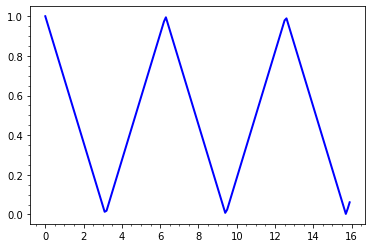

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

t=np.arange(0,16,0.1) # niz od 0 do 16 s korakom 0.1
tri=np.abs(signal.sawtooth( t)) 

fig, ax = plt.subplots()
ax.minorticks_on()
ax.plot(t,tri,linewidth=2,color='b')
plt.show()

### Pravokotni signal

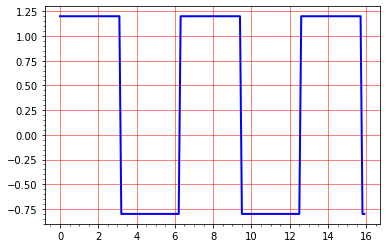

In [3]:
# pravokotni signal - z dodano grobo mrežo
square = signal.square( t, duty=1/2)+0.2
fig, ax = plt.subplots()
ax.minorticks_on()
ax.plot(t,square,linewidth=2,color='b')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.show()

### Sinusni signal

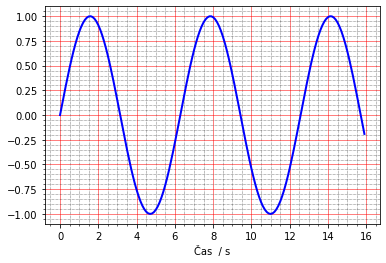

In [4]:
# Sinusni signal z grobo in fino mrežo
y=np.sin(t)
fig, ax = plt.subplots()
ax.minorticks_on()
ax.plot(t,y,linewidth=2,color='b')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.set_xlabel('Čas  / s')
plt.show()

### Zdaj pa ti 
(Rešitve so na koncu zvezka)
* Poišči periodo sinusnega signala iz slike in določi njegovo frekvenco.
* Določi periodo signala iz ogleda zgornje celice, ki signal izdela.
* Izdelaj signal s periodo 5 sekund in prikaži tri periode. 
* Poskušaj določiti periodo generiranega signala z izdelavo ustrezne kode.

## Fazni kot

Običajno imamo opravka s harmoničnimi signali oblike $i(t)=I_m\sin(\omega t + \varphi)$. $I_m$ je amplituda signala, $\omega=2\pi f$ je krožna frekvenca in $\varphi$ je fazni kot signala. 
Izdelajmo tri signale:

$i_1(t)=2\sin(5 t )$

$i_2(t)=2\sin(5 t +\pi/4 )$

$i_3(t)=2\sin(5 t -\pi/2)$

in jih poglejmo na grafu.

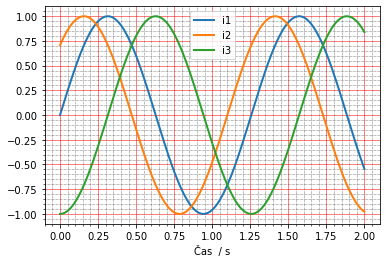

In [5]:
# Sinusni signali
omega=5
t=np.linspace(0,10/omega,200)
i1=np.sin(omega*t)
i2=np.sin(omega*t+np.pi/4)
i3=np.sin(omega*t-np.pi/2)

fig, ax = plt.subplots()
ax.minorticks_on()
ax.plot(t,i1,linewidth=2,label='i1')
ax.plot(t,i2,linewidth=2,label='i2')
ax.plot(t,i3,linewidth=2,label='i3')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.set_xlabel('Čas  / s')
ax.legend()
plt.show()

**Ugotovitve:** signal i2 je fazno zamaknjen za $\pi/4$ v levo relativno na i1, signal i3 pa je glede na i1 fazno zamaknjen v desno za $\pi/2$. $+\varphi$ torej predstavlja zamik signala v levo, rečemo tudi da signal i2 "prehiteva" signal i1 za fazni kot $\pi/4$. Signal i3 pa "zaostaja" za i1 za $\pi/2$. Da signal prehiteva rečemo zato, ker npr. max signala nastopi za $\pi/4$ oz. osmino periode signala pred signalom i1. V resnici seveda ni tako, da en signal prehiteva drugega, saj vsi signali nastopajo hkrati - gre torej le za način razlage časovnega zamika signalov.

**Zdaj pa ti:** Določi, koliko je to časovno - osmina periode signala? (Rešitev je v spodnji celici)

In [0]:
# omega=2*pi*f=2*pi/T
T=2*np.pi/omega
print('i2 je zamaknjen glede na i1 za čas  ',T/8,'s')

i2 je zamaknjen glede na i1 za čas   0.15707963267948966 s


## Srednja (povprečna) vrednost signala

je določena s površino pod krivuljo signala v eni periodi deljena s periodo signala. Za negativne vrednosti signala je površina negativna. Matematično (za npr. tokovni signal) to zapišemo kot
	${{I}_{sr}}=\frac{1}{T}\int\limits_{0}^{T}{i(t)\text{d}t}.$

Pomembno je, da računamo srednjo vrednost periodičnega signala točno za eno (ali več) period. Če pogledamo zgornje signale, so vsi izrisani za necelo periodo, torej ne smemo računati povprečja celotnega signala pač pa moramo najprej poiskati periodo signala in šele nato računati povprečje.

Npr. v prejšnji celici smo izdelali časovni signal od 0 do $10/\omega$ v 200 korakih, torej je en korak $10/200\omega$. Ena perioda signala je pri $\omega T=2\pi$, torej pri $T=2\pi/\omega$, za kar potrebujemo x korakov, kjer je $2\pi/\omega=x 10/(200\omega)$. $x=40\pi$ korakov. Izračun je v spodnji vrstici. Za izračun povprečja niza uporabimo funkcijo *mean*.

In [13]:
# Izračun srednje vrednosti sinusnega signala
x=int(40*np.pi) # periodo računamo od 0 do x, ki mora biti int vrednost, tako, da je lahko bolj natančen izračun tudi pri x+1
print(i1[x]) # približno 0
Isr=np.mean(y[0:x])
print('Isr = ',Isr)

-0.0017782710664830663
Isr =  0.00044127844926087034


**Ugotovitve:** Srednja vrednost sinusnega signala je seveda (približno) enaka 0, saj je enaka površina signala nad 0 (+) kot pod 0 (-). Približno zato, ker ne moremo natančno "ujeti" periode signala, saj ni izrisan tako, da bi imel določeno vrednost ob periodi signala.

**Zdaj pa ti:** Izračunaj srednjo vrednost žagastega signala iz zgornje (prve) celice. (Rešitev je na koncu zvezka)

## Efektivna vrednost signala (ang RMS - root mean square)

je določena kot koren iz srednje vrednosti kvadrata signala:
$${{I}_{ef}}=\sqrt{\frac{1}{T}\int\limits_{0}^{T}{{{i}^{2}}(t)\cdot dt}}$$

Enako kot pri srednji vrednosti, je tudi pri izračunu efektivne vrednosti potrebno zagotoviti, da upoštevamo polno periodo signala. 

Izračunajmo efektivno vrednost sinusnega signala iz prejšnje celice.

Ief =  0.707206771982


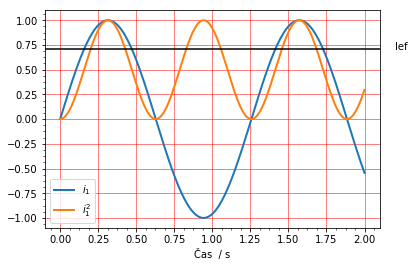

In [0]:
# Izračun efektivne vrednosti sinusnega signala
omega=5
t=np.linspace(0,10/omega,200)
i1=np.sin(omega*t)
i1_2=i1*i1 # kvadrat signala

Ief=np.sqrt(np.mean(i1_2[0:x])) # koren iz srednje vrednosti kvadrata signala
print('Ief = ',Ief)

fig, ax = plt.subplots()
ax.minorticks_on()
ax.plot(t,i1,linewidth=2,label='$i_1$')
ax.plot(t,i1_2,linewidth=2,label='$i_1^2$')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.axhline(Ief,color='k')
ax.set_xlabel('Čas  / s')
ax.text(max(1.1*t),Ief,'Ief')
ax.legend()
plt.show()

**Ugotovitve:** Efektivna vrednost sinusnega signala seveda ni enaka 0, saj je potrebno poiskati povprečje kvadrata signala, ki pa je vedno pozitiven. V konkretnem primeru je rezultat 0.70..., kar je enako $1/\sqrt2$. Kar je znan rezultat - da je za sinusni signal $I_{ef}=\frac{I_m}{\sqrt2}$.

**Zdaj pa ti:** Izračunaj efektivno vrednost žagastega signala. (Rešitev je na koncu zvezka). 

**Če bi to bil programerski tečaj, bi prav gotovo želeli, da sami napišete funkcijo, ki vrne srednjo in efektivno vrednost signala. Če bi še malo komplicirali, bi si npr. zaželeli, da funkcija sama ugotovi periodo signala.**

## Še par parametrov

### Usmerjena vrednost (ANG. RECTIFIED)

Usmerjena vrednost je določena kot povprečje usmerjenega signala, torej kot povprečna vrednost absolutne vrednosti signala.
	$${{I}_{r}}=\frac{1}{T}\int\limits_{0}^{T}{\left| i(t) \right|\text{d}t}$$	

### Faktor oblike (ANG. FORM FACTOR)

Faktor oblike pogosto uporabimo za karakterizacijo oblike signala. Določen je kot kvocient efektivne in usmerjene vrednosti
	$$\text{faktor oblike}=FF=\frac{{{I}_{ef}}}{{{I}_{r}}}.$$
    
### TEMENSKI FAKTOR (ANG. CREST FACTOR)

Temenski faktor je definiran kot kvocient maksimalne in efektivne vrednosti
	$$\text{temenski faktor}=\frac{{{I}_{m}}}{{{I}_{ef}}}$$	


Določimo te tri faktorje za sinusni signal.V spodnji celici.

In [0]:
## Usmerjena vrednost sinusnega signala
# prej morata biti izračunana Ief in Isr
Ir=np.mean(abs(i1[0:x])) # koren iz srednje vrednosti kvadrata signala
print('Ir = ',Ir)

# faktor oblike
FF=Ief/Ir
print('FF = ',FF)

# temenski faktor
TF=1/Ief
print('TF = ',TF)


Ir =  0.636759008193
FF =  1.11063489151
TF =  1.41401360906


## Rešitve

Rešitve nalog 1.3:

1. Iz grafa se lahko le približno določi periodo. Nekoli olajša oceno, če uporabimo fino mrežo, kot je na grafu. Recimo da je perioda 6.1 sek, kar pomeni frekvenco 1/6.1=0.16 Hz.
2. Iz celice za izračun ugotovimo, da izrisujemo signal sin(t), ki ima periodo $T=2\pi\approx 6.28 s.$ 
3. Rešitev izrisa signala s periodo 5 sek je v spodnji celici.
4. Rešitev izračuna periode je spodaj. Uporabimo funkcijo *np.where*, da poiščemo  vredosti, za katere  je signal manjši od 0.... Za preverjanje lahko kreiramo tabelo vrednosti časa in signala ter poiščemo točko periode. (Če bi želeli bolj natančno določitev, bi tudi morali imeti izračun signala pri T=5 sek. To lahko naredimo tako, da uporabimo za izdelavo niza vrednosti časa funkcijo np.arange, kot je to v prvi celici tega zvezka). 

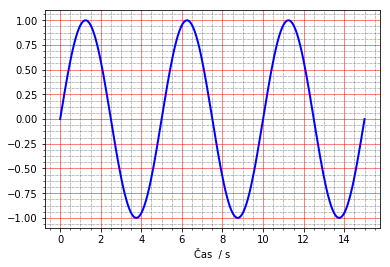

In [0]:
# Sinusni signal s periodo 5 sek
T=5
freq=1/T
omega=2*np.pi*freq
t=np.linspace(0,3*5,200)
#t=np.arange(0,3*T,0.1) # niz od 0 do 15 s korakom 0.1
y=np.sin(omega*t)
fig, ax = plt.subplots()
ax.minorticks_on()
ax.plot(t,y,linewidth=2,color='b')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.set_xlabel('Čas  / s')
plt.show()

In [0]:
# Poiščem periodo signala
indeks=np.where(y<0)  # indeksi, kjer je y<0
indeks2=np.where(y[indeks[0][0]:len(y)]>0) # nato indeksi od tam, kjer gre iz neg v pozit
indeks12=indeks[0][0]+indeks2[0][0] # skupni indeks
print(t[indeks12]) # čas pri vsoti indeksov je perioda

# preverim s tabelo 
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
f=pd.DataFrame([t,y]) # izdelam tabelo
f.T[1:70] # transponiram in izpišem tabelo

5.05025125628


,0,1
1,0.08,0.09
2,0.15,0.19
3,0.23,0.28
4,0.30,0.37
5,0.38,0.46
6,0.45,0.54
7,0.53,0.62
8,0.60,0.69
9,0.68,0.75
10,0.75,0.81


Isr =  0.50142190575
Isr2 =  0.5


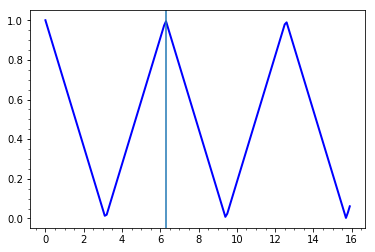

In [0]:
# Izračun srednje vrednosti žagastega signala
t=np.arange(0,16,0.1) # niz od 0 do 16 s korakom 0.1
tri=np.abs(signal.sawtooth( t)) 

T=2*np.pi # perioda 2pi=0.1x, kjer je 0.1 korak
x=int(T/0.1+1) # indeks periode, x mora biti integer
Isr=np.mean(tri[0:x]) # izračun povprečja od 0 do periode
print('Isr = ',Isr)

# Drug način izračuna: Isr=površina signala/perioda
Isr2=1*T/2/T 
print('Isr2 = ',Isr2)

fig, ax = plt.subplots()
ax.minorticks_on()
ax.plot(t,tri,linewidth=2,color='b')
ax.axvline(t[x])
plt.show()

Ief =  0.57897379996


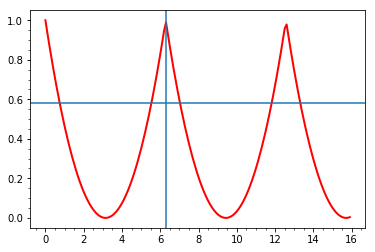

In [0]:
# Izračun efektivne vrednosti žagastega signala
t=np.arange(0,16,0.1) # niz od 0 do 16 s korakom 0.1
tri=np.abs(signal.sawtooth( t)) 

tri2=tri**2 # kvadrat signala

T=2*np.pi # perioda 2pi=0.1x, kjer je 0.1 korak
x=int(T/0.1+1) # indeks periode
Ief=np.sqrt(np.mean(tri2[0:x])) # izračun povprečja od 0 do periode
print('Ief = ',Ief)

fig, ax = plt.subplots()
ax.minorticks_on()
ax.plot(t,tri2,linewidth=2,color='r')
ax.axvline(t[x])
ax.axhline(Ief)
plt.show()

## Zaključek

V zvezku smo prikazali možnost uporabe Jupytra za prikaz in analizi periodičnih signalov. Pokazali smo kako fazni kot vpliva na časovni premik signala. Prikazali smo način izračuna srednje in efektivne vrednosti signala ter nekaj osnovnih parametrov, kot so usmerjena vrednost, faktor oblike in temenski faktor.

**Naslednje branje:** 